In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [6]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [9]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

Сгруппируйте данные по дате, посчитайте количество продаж

In [12]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [15]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

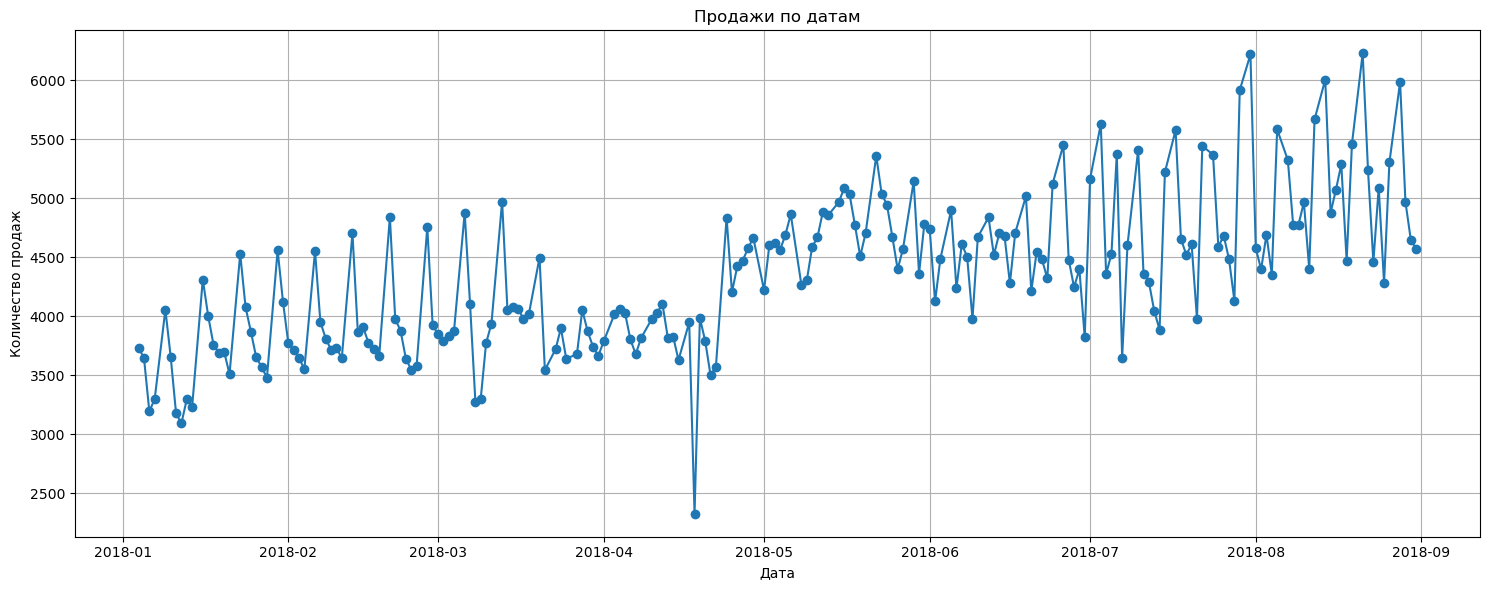

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o')
plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

#### График показывает устойчивый рост продаж с регулярными колебаниями, возможно, связано с будними и выходными днями. Есть один мощный спад в апреле и несколько сильных пиков в августе, вероятно, из-за сезонности/несезоннности.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [23]:
max_row = df[df['Количество'] == df['Количество'].max()]
print(max_row)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [26]:
filtered_df = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Дата'].dt.weekday == 2) &
    (df['Склад'] == 3)
]

top_product = (filtered_df.groupby('Номенклатура')['Количество'].sum().sort_values(ascending=False).reset_index())
top_product.head(1)

,Номенклатура,Количество
0,product_1,2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [39]:
weather_df = pd.read_excel('astana_weather.xls')
weather_df.head(5)

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.08.2018 21:00,9.6,736.4,767.9,1.2,88.0,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,31.08.2018 18:00,11.3,735.2,766.4,0.4,83.0,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
2,31.08.2018 15:00,12.3,734.8,765.9,0.9,80.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN
3,31.08.2018 12:00,13.2,733.9,764.8,1.0,83.0,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,10.3,3,12.0,NaN,NaN,NaN,NaN
4,31.08.2018 09:00,12.5,732.9,763.9,0.1,99.0,"Ветер, дующий с северо-северо-запада",2,NaN,NaN,...,NaN,NaN,4.0,12.3,3,12.0,Поверхность почвы сырая (вода застаивается на ...,8.0,NaN,NaN


In [45]:
weather_df = weather_df[['Местное время в Астане', 'T']]
weather_df['Дата'] = pd.to_datetime(weather_df['Местное время в Астане'], dayfirst=True).dt.date

daily_weather = weather_df.groupby('Дата')['T'].mean().reset_index()
daily_weather.columns = ['Дата', 'Mean_Temp']

daily_weather.head()

,Дата,Mean_Temp
0,2018-01-04,-13.0875
1,2018-01-05,-17.2500
2,2018-01-06,-14.1250
3,2018-01-07,-12.3375
4,2018-01-08,-15.4375


In [59]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'])
daily_weather['Дата'] = pd.to_datetime(daily_weather['Дата'])

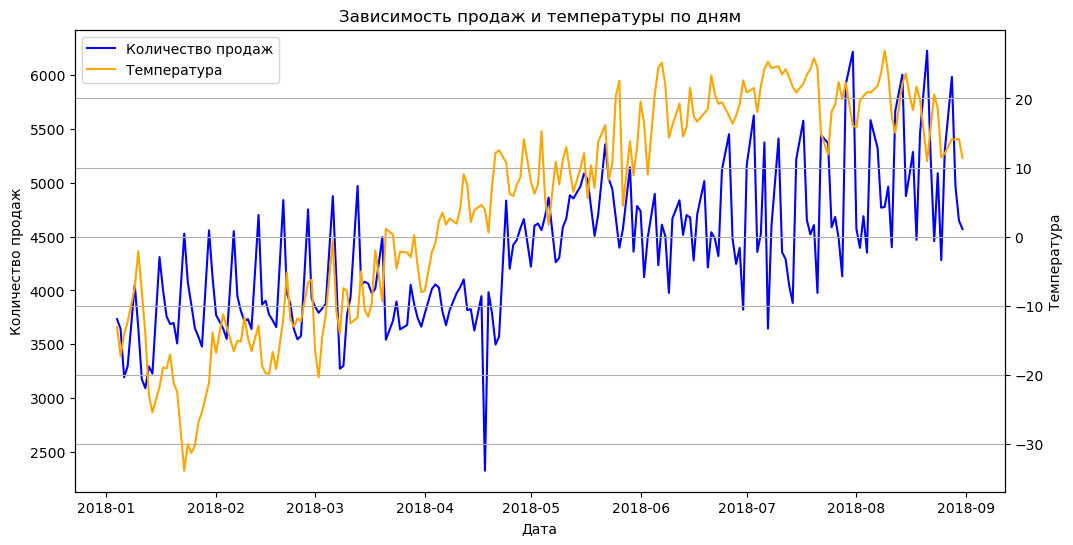

In [85]:
merged_df = pd.merge(grouped_df, daily_weather, on='Дата')

fig, ax1 = plt.subplots(figsize=(12, 6))

# Первая линия — количество продаж
line1, = ax1.plot(merged_df['Дата'], merged_df['Количество'], label='Количество продаж', color='blue')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж')

# Вторая ось и линия — температура
ax2 = ax1.twinx()
line2, = ax2.plot(merged_df['Дата'], merged_df['Mean_Temp'], color='orange', label='Температура')
ax2.set_ylabel('Температура')

plt.title('Зависимость продаж и температуры по дням')
plt.grid(True)
plt.legend([line1, line2], ['Количество продаж', 'Температура'])
plt.show()

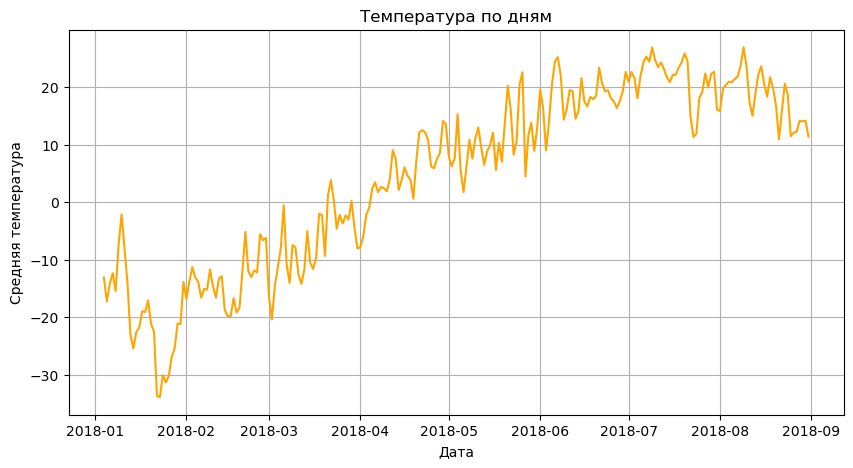

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(daily_weather['Дата'], daily_weather['Mean_Temp'], color='orange')
plt.title('Температура по дням')
plt.xlabel('Дата')
plt.ylabel('Средняя температура')
plt.grid(True)
plt.show()